# Abstract

Liver cirrhosis is a prevalent health concern, particularly in North America, attributable to elevated alcohol consumption. The objective of this project is to develop a predictive model for liver cirrhosis based on an individual's lifestyle and health conditions. The disease is categorized into four stages:

Stage 1: Normal

Stage 2: Fatty Liver

Stage 3: Liver Fibrosis

Stage 4: Liver Cirrhosis

The primary goal is to accurately predict the specific stage of liver cirrhosis based on a dataset comprising both numerical and categorical features related to an individual's lifestyle and health.

# Data Set
The data set consists of :

1. N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Triglycerides,Platelets,Prothrombin - The independent variables
2. Stage - The dependent variable
3. There are a total of 418 observations.

In [ ]:
# installing dependencies
!pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
from google.colab import files

uploaded = files.upload()



Saving cirrhosis.csv to cirrhosis.csv


In [ ]:
# Reading the dataset
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
#1)Data Types - both numerical and Categorical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('numerical columns List-',numeric_columns)
print('categorical columns List-',categorical_columns)

numerical columns List- Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
categorical columns List- Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [ ]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [ ]:
df.shape

(418, 20)

In [ ]:
#2)Missing Values
missing_values = df.isnull().sum()
missing_values

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
#5)
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Create a DataFrame to show missing values
missing_data_info = pd.DataFrame({
    'Column': columns_with_missing,
    'Missing Values': df[columns_with_missing].isnull().sum(),
    'Percentage Missing': (df[columns_with_missing].isnull().sum() / len(df)) * 100
})

# Display the information about missing values
print("Columns with Missing Data:")
print(missing_data_info)


Columns with Missing Data:
                      Column  Missing Values  Percentage Missing
Drug                    Drug             106           25.358852
Ascites              Ascites             106           25.358852
Hepatomegaly    Hepatomegaly             106           25.358852
Spiders              Spiders             106           25.358852
Cholesterol      Cholesterol             134           32.057416
Copper                Copper             108           25.837321
Alk_Phos            Alk_Phos             106           25.358852
SGOT                    SGOT             106           25.358852
Tryglicerides  Tryglicerides             136           32.535885
Platelets          Platelets              11            2.631579
Prothrombin      Prothrombin               2            0.478469
Stage                  Stage               6            1.435407


In [ ]:
# Impute missing values for numerical columns with mean
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Impute missing values for categorical columns with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [ ]:
df.to_csv('imputed_data.csv', index=False)

from google.colab import files
files.download('imputed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

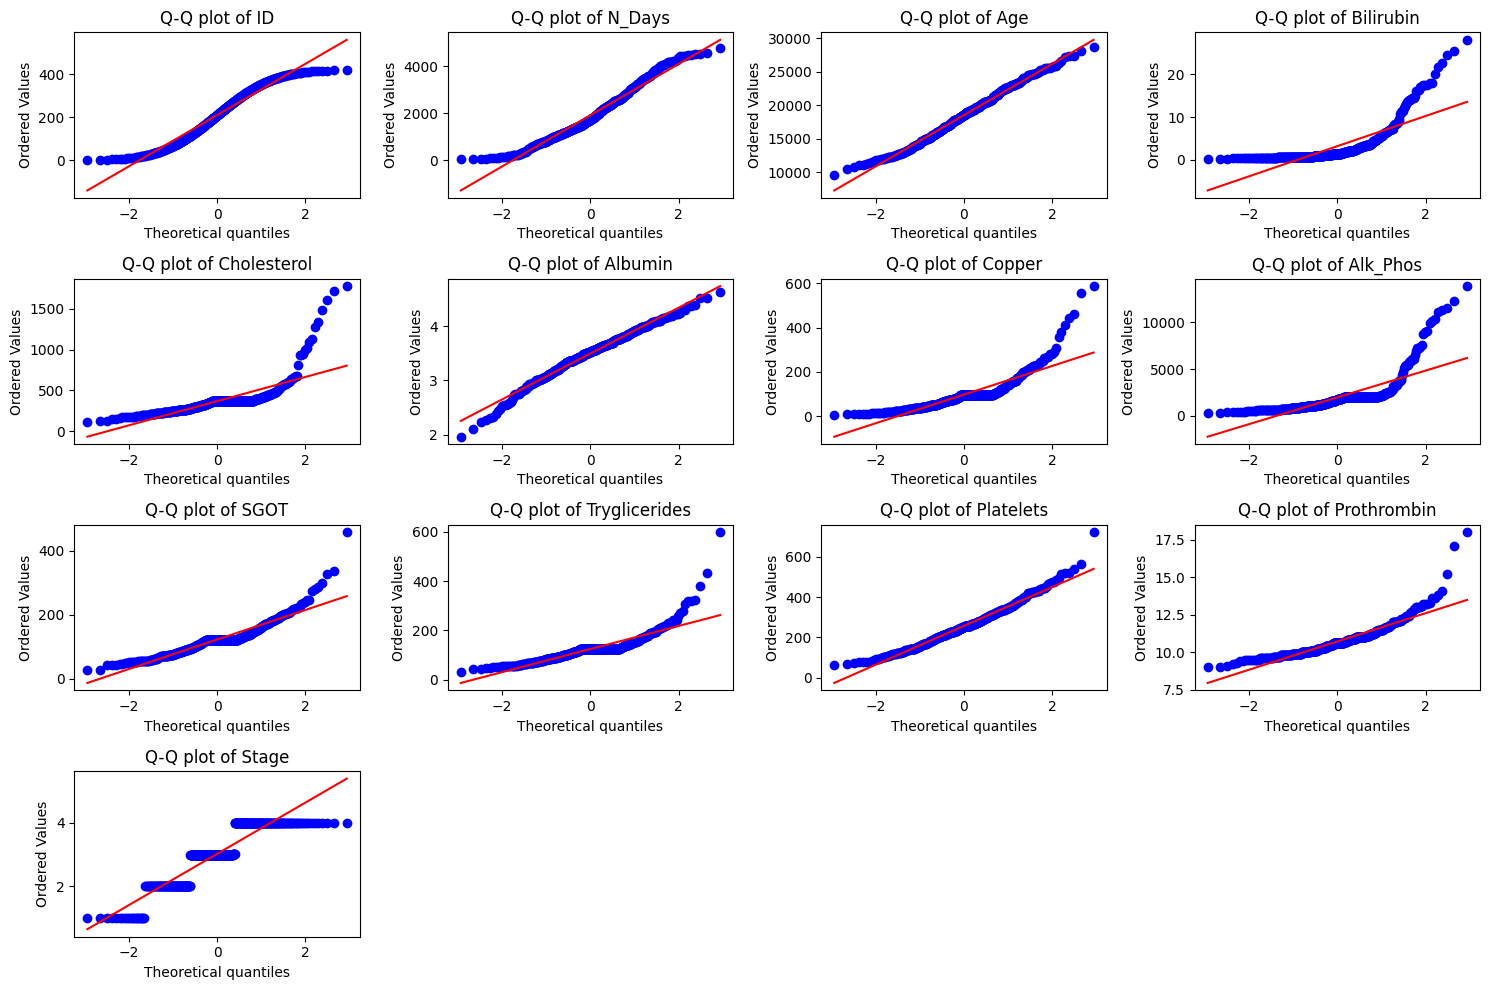

In [ ]:
#3)likely distributions of the numeric variables
import scipy.stats as stats

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the number of rows and columns needed based on the number of numeric columns
num_numeric_columns = len(numeric_columns)
num_rows = (num_numeric_columns - 1) // 4 + 1
num_cols = min(num_numeric_columns, 4)

# Plotting Q-Q plots for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('Q-Q plot of ' + column)

plt.tight_layout()
plt.show()



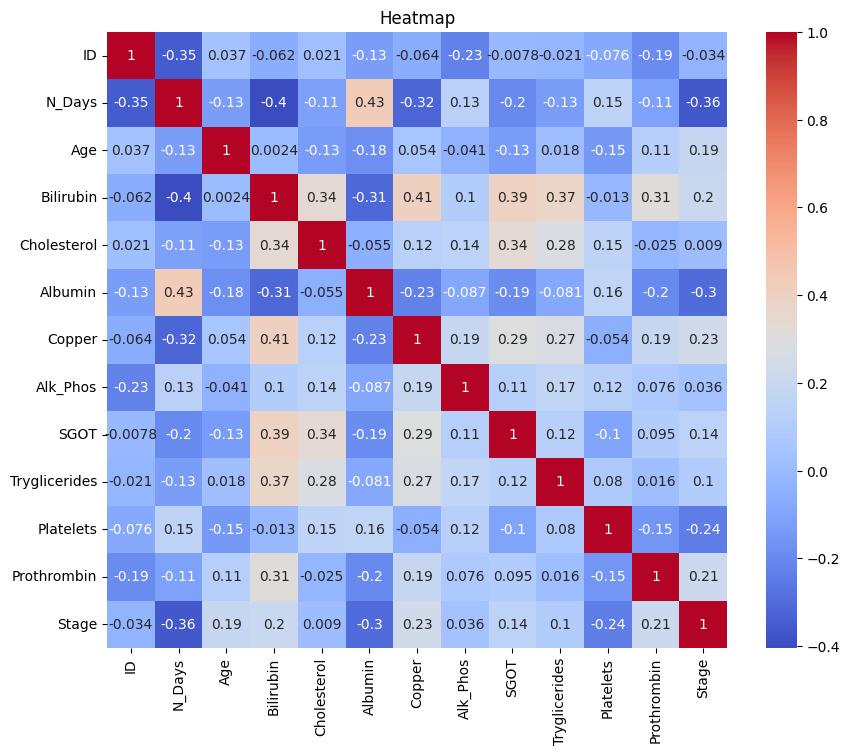

<ipython-input-131-f447590f843b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.037136,-0.062154,0.020507,-0.128924,-0.063529,-0.227543,-0.007801,-0.021199,-0.075573,-0.191176,-0.033535
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.114683,0.430829,-0.319775,0.131080,-0.198015,-0.126912,0.147495,-0.111042,-0.361992
Age,0.037136,-0.125934,1.000000,0.002362,-0.130578,-0.182350,0.053617,-0.041326,-0.131087,0.018278,-0.145948,0.113728,0.188105
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.337809,-0.314177,0.405228,0.103842,0.392107,0.371490,-0.013347,0.312593,0.200272
Cholesterol,0.020507,-0.114683,-0.130578,0.337809,1.000000,-0.054572,0.123024,0.140112,0.337282,0.276828,0.150683,-0.025016,0.008999
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.054572,1.000000,-0.225532,-0.086570,-0.187761,-0.080804,0.156384,-0.199386,-0.302362
Copper,-0.063529,-0.319775,0.053617,0.405228,0.123024,-0.225532,1.000000,0.187285,0.293547,0.272473,-0.053898,0.185349,0.232264
Alk_Phos,-0.227543,0.131080,-0.041326,0.103842,0.140112,-0.086570,0.187285,1.000000,0.112217,0.168702,0.120688,0.076040,0.035733
SGOT,-0.007801,-0.198015,-0.131087,0.392107,0.337282,-0.187761,0.293547,0.112217,1.000000,0.119463,-0.100611,0.095427,0.142805
Tryglicerides,-0.021199,-0.126912,0.018278,0.371490,0.276828,-0.080804,0.272473,0.168702,0.119463,1.000000,0.080049,0.016290,0.099874


In [ ]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()
df.corr()




N_Days: The plot suggests a right-skewed distribution with potential outliers at higher values.

Age: The plot shows that the age variable is somewhat normally distributed in the central quantiles but deviates at the tails, indicating potential outliers and skewness.

Bilirubin: Shows a pronounced right skew with potential outliers at higher values.

Cholesterol: This variable exhibits right skewness with outliers at the higher end.

Albumin: Appears to be normally distributed in the middle quantiles but with outliers at both the low and high ends.

Copper: The plot suggests a right-skewed distribution with several outliers at higher values.

Alk_Phos (alkaline phosphatase?): There is a strong right skew with many high-end outliers.

SGOT (serum glutamic-oxaloacetic transaminase?): Shows a right-skewed distribution with outliers at higher values.

Triglycerides: Right-skewed with outliers at the higher end.

Platelets: The distribution shows right skewness with several outliers at higher values.

Prothrombin: The plot appears somewhat normal in the central range but with outliers at both tails, particularly at higher values.

Stage: This appears to be an ordinal or categorical variable with distinct steps and outliers, and it's not normally distributed.

In [ ]:
#4) finding which independent variables are useful to predict a target variable by performing three methods:-
#Method1- Lasso Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming the target variable is the last column in the dataset
X = df.iloc[:, :-1]  # all columns except the last one as features
y = df.iloc[:, -1]   # the last column as the target

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a preprocessor that one-hot encodes categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply the preprocessor to the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Use the same preprocessor to transform the test data
X_test_encoded = preprocessor.transform(X_test)

# Get the original column names after one-hot encoding
all_feature_names = preprocessor.get_feature_names_out(X.columns)

# Fit LassoCV on the one-hot encoded data
lasso = LassoCV(cv=5).fit(X_train_encoded, y_train)

# Get the coefficients of the selected features
lasso_coef = lasso.coef_ != 0

# Get the selected features using the original column names
selected_features_lasso = all_feature_names[lasso_coef]

# Display the selected features
print("Selected Features (Lasso):")
print(selected_features_lasso)

Selected Features (Lasso):
['remainder__ID' 'remainder__N_Days' 'remainder__Age'
 'remainder__Cholesterol' 'remainder__Copper' 'remainder__Alk_Phos'
 'remainder__Platelets']


In [ ]:
# Method2: RandomForest Regressor
# rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_encoded, y_train)
importances_rf = rf.feature_importances_

# Get the original column names after one-hot encoding
all_feature_names = preprocessor.get_feature_names_out(X.columns)

# Sort indices and select top 5 features
indices_rf = np.argsort(importances_rf)[::-1]
selected_features_rf = all_feature_names[indices_rf[:5]]

# Display the selected features
print("Selected Features (RandomForest):")
print(selected_features_rf)

Selected Features (RandomForest):
['remainder__N_Days' 'remainder__Prothrombin' 'remainder__Albumin'
 'remainder__Platelets' 'remainder__Bilirubin']


In [ ]:
# Method 3: Recursive Feature Elimination with Cross-Validation (RFECV)
linear_reg = LinearRegression()
rfecv = RFECV(estimator=linear_reg, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_train_encoded, y_train)

# Get the original column names after one-hot encoding
all_feature_names = preprocessor.get_feature_names_out(X.columns)

# Get the selected features using the original column names
selected_features_rfecv = all_feature_names[rfecv.support_]
#display selected features
print("Selected Features (RFE):")
print(selected_features_rfecv)

Selected Features (RandomForest):
['cat__Status_C' 'cat__Status_CL' 'cat__Status_D'
 'cat__Drug_D-penicillamine' 'cat__Drug_Placebo' 'cat__Sex_F' 'cat__Sex_M'
 'cat__Ascites_N' 'cat__Ascites_Y' 'cat__Hepatomegaly_N'
 'cat__Hepatomegaly_Y' 'cat__Spiders_N' 'cat__Spiders_Y' 'cat__Edema_N'
 'cat__Edema_S' 'cat__Edema_Y' 'remainder__ID' 'remainder__N_Days'
 'remainder__Bilirubin' 'remainder__Cholesterol' 'remainder__Albumin'
 'remainder__Copper' 'remainder__SGOT' 'remainder__Tryglicerides'
 'remainder__Platelets' 'remainder__Prothrombin']


In [ ]:
#6)Checking Trainig and Tests have same data
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop(columns=['Stage'])  # Assuming 'Stage' is the target
y = df['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for overlap
train_test_overlap = pd.merge(X_train, X_test, how='inner')

# If there's overlap, the merged DataFrame won't be empty
overlap_exists = not train_test_overlap.empty
print("Is there overlap between training and test sets?", overlap_exists)

Is there overlap between training and test sets? False


In [ ]:
#7)
# Calculate the correlation matrix for the numerical variables in the dataset
correlation_matrix = data.select_dtypes(include=[float, int]).corr()

# Display the correlation matrix
correlation_matrix

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.037136,-0.062154,0.032897,-0.128924,-0.098663,-0.352856,-0.012097,-0.034100,-0.076699,-0.191930,-0.033757
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Age,0.037136,-0.125934,1.000000,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731
Cholesterol,0.032897,-0.138236,-0.157620,0.397129,1.000000,-0.069733,0.126115,0.149473,0.353246,0.276830,0.191710,-0.030811,0.011164
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.069733,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.158659,-0.200592,-0.305296
Copper,-0.098663,-0.364809,0.061549,0.456918,0.126115,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224,0.269400
Alk_Phos,-0.352856,0.149269,-0.047247,0.116984,0.149473,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384,0.041273
SGOT,-0.012097,-0.225492,-0.149869,0.441730,0.353246,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174,0.164945
Tryglicerides,-0.034100,-0.153000,0.022065,0.436748,0.276830,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122,0.123899


#the predictor variables independent of all the other predictor variables
ID and Cholesterol (−0.021)
ID and Triglycerides (−0.021)
ID and Platelets (−0.076)
N_Days and Age (−0.13)
N_Days and Albumin (0.43)
N_Days and Copper (−0.32)
N_Days and Alk_Phos (0.13)
N_Days and SGOT (−0.078)
Age and Bilirubin (0.037)
Age and Copper (0.054)
Age and Triglycerides (0.018)
Bilirubin and Cholesterol (−0.021)
Bilirubin and Albumin (−0.13)
Cholesterol and Alk_Phos (0.14)

Cholesterol and Platelets (0.16)
Albumin and Triglycerides (−0.081)
Copper and Platelets (−0.054)
Alk_Phos and Triglycerides (0.17)
SGOT and Platelets (0.12)
Triglycerides and Prothrombin (0.08)

These pairs have correlation coefficients close to 0, indicating a very weak or no linear relationship. It's important to remember that while these pairs may not have a strong linear relationship, they are not necessarily completely independent; there could be non-linear relationships or interactions that are not captured by a correlation coefficient.

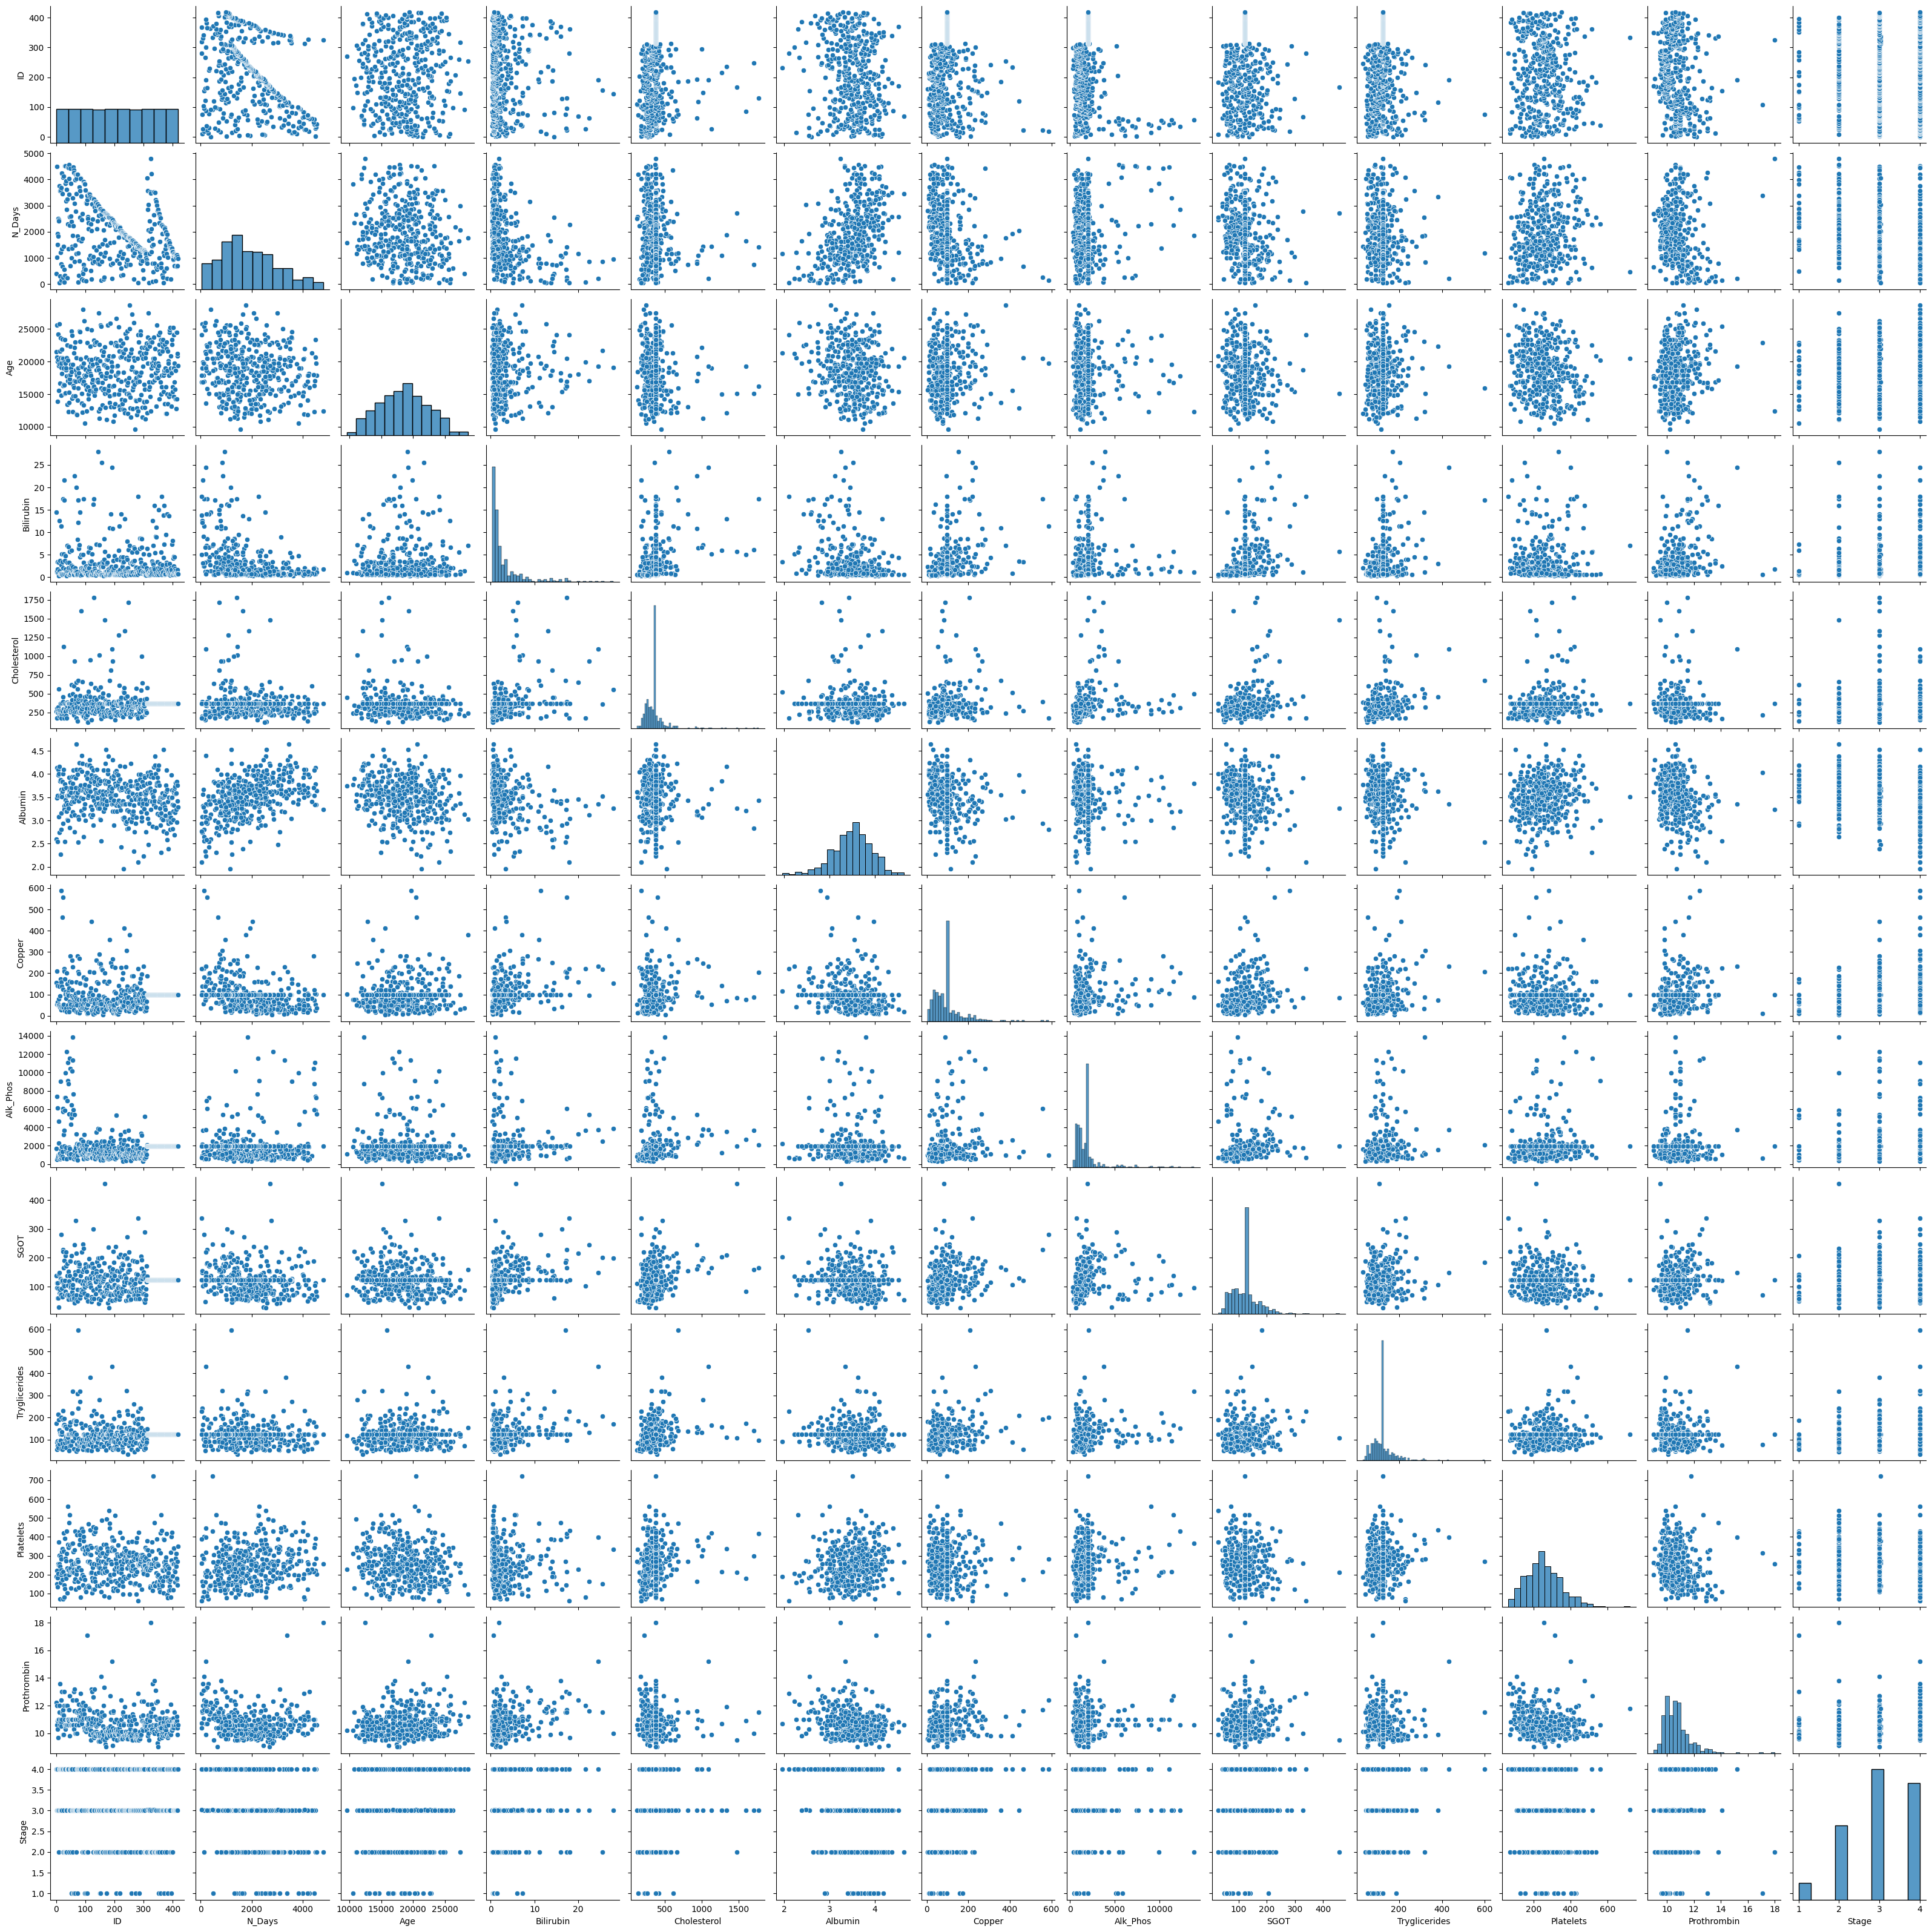

In [ ]:
# pair plot to check the colinearity
sns.pairplot(df)

In [ ]:
#8)predictor variables which are most important
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load your dataset
# Assuming df is your DataFrame

# Step 1: Check Data Types
print("Data Types Before Conversion:")
print(df.dtypes)

# Step 2: Convert Data Types
# Example: Convert the 'Age' column to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 3: Handle Missing Values
# Example: Impute missing values with mean for the 'Age' column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Check Data Types After Conversion
print("\nData Types After Conversion:")
print(df.dtypes)

# Step 4: One-Hot Encode Categorical Columns
df_encoded = pd.get_dummies(df, columns=['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

# Print column names after one-hot encoding
print("\nColumn Names After One-Hot Encoding:")
print(df_encoded.columns)

# Update the predictor list based on the actual column names
predictor_columns = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT",
    "Tryglicerides", "Platelets", "Prothrombin"
] + list(df_encoded.columns)

# Step 5: Fit OLS Model
# Assuming 'Stage' is the target variable and selected columns are predictors
endog = np.asarray(df_encoded['Stage'])
exog = np.asarray(df_encoded[predictor_columns])

# Fit the OLS model
model = sm.OLS(endog, sm.add_constant(exog)).fit()

# Print out the statistics
print(model.summary())

Data Types Before Conversion:
ID               float64
N_Days           float64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Data Types After Conversion:
ID               float64
N_Days           float64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
P

Selected Features (RandomForest):
['remainder__N_Days' 'remainder__Prothrombin' 'remainder__Albumin'
 'remainder__Platelets' 'remainder__Bilirubin'] These are the selected features that is predictor variables according to Random Forest method.
 These features provide information about the patient's liver function, blood clotting, and overall health, contributing to the model's predictive performance.

In [ ]:
#9)import pandas as pd


# Display statistical summary of the dataframe to understand the ranges
cirrhosis_data_summary = df.describe()

# Print the summary statistics for all the columns
print(cirrhosis_data_summary)

               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   418.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   191.077413   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   273.000000   
50%    209.500000  1730.000000  18628.000000    1.400000   369.510563   
75%    313.750000  2613.500000  21272.500000    3.400000   369.510563   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  418.000000    418.000000  418.000000     418.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   73.697982   1848.437803   48.965657      53.479887   
min      1.960000    4.000000    289.000000   

The ranges of the predictor variables in the dataset seem to have reasonable values. Here are some observations:

Age:

Minimum age is around 9598, which seems unusual. This might be an error or an outlier.
The range of ages is between 9598 and 28650.

Bilirubin:

The range of bilirubin levels is between 0.3 and 28, which is reasonable for liver function tests.

Cholesterol:

The range of cholesterol levels is between 120 and 1775, which is within expected limits.

Albumin:

Albumin levels range from 1.96 to 4.64, which is consistent with normal physiological values.

Copper:

Copper levels range from 4 to 588, which can be considered reasonable.

Alk_Phos (Alkaline Phosphatase):

Alk_Phos levels have a wide range, from 289 to 13862.4. This might have some extreme values or outliers.

SGOT (Serum Glutamic Oxaloacetic Transaminase):

SGOT levels range from 26.35 to 457.25, which is within the expected range.

Tryglicerides:

The range of triglyceride levels is within normal limits.

Platelets:

Platelet counts range from 62 to 721, which is reasonable.

Prothrombin:

Prothrombin levels range from 9 to 18, which is within the expected range.

Stage:

The stage variable ranges from 1 to 4, which aligns with the expected stages of liver disease.


#10)
N_Days: The plot suggests a right-skewed distribution with potential outliers at higher values.

Age: The plot shows that the age variable is somewhat normally distributed in the central quantiles but deviates at the tails, indicating potential outliers and skewness.

Bilirubin: Shows a pronounced right skew with potential outliers at higher values.

Cholesterol: This variable exhibits right skewness with outliers at the higher end.

Albumin: Appears to be normally distributed in the middle quantiles but with outliers at both the low and high ends.

Copper: The plot suggests a right-skewed distribution with several outliers at higher values.

Alk_Phos (alkaline phosphatase): There is a strong right skew with many high-end outliers.

SGOT (serum glutamic-oxaloacetic transaminase): Shows a right-skewed distribution with outliers at higher values.

Triglycerides: Right-skewed with outliers at the higher end.

Platelets: The distribution shows right skewness with several outliers at higher values.

Prothrombin: The plot appears somewhat normal in the central range but with outliers at both tails, particularly at higher values.


               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  249.000000   249.000000    249.000000  249.000000   249.000000   
mean   240.273092  2067.582329  18516.742972    1.455020   327.239309   
std    116.105163   987.563576   3836.596686    1.183141    67.516455   
min      5.000000    41.000000   9598.000000    0.300000   132.000000   
25%    146.000000  1295.000000  15694.000000    0.700000   267.000000   
50%    251.000000  1987.000000  18713.000000    1.100000   369.510563   
75%    342.000000  2698.000000  21185.000000    1.800000   369.510563   
max    418.000000  4232.000000  28018.000000    6.800000   486.000000   

          Albumin      Copper     Alk_Phos        SGOT  Tryglicerides  \
count  249.000000  249.000000   249.000000  249.000000     249.000000   
mean     3.569357   73.907864  1456.989543  112.198577     110.257114   
std      0.360331   34.479982   563.260418   30.938056      26.609512   
min      2.480000    9.000000   289.000000   41.85

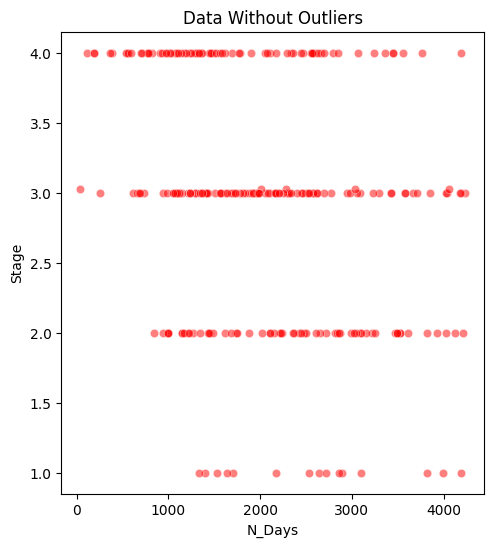

None
               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   418.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   191.077413   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   273.000000   
50%    209.500000  1730.000000  18628.000000    1.400000   369.510563   
75%    313.750000  2613.500000  21272.500000    3.400000   369.510563   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  418.000000    418.000000  418.000000     418.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   73.697982   1848.437803   48.965657      53.479887   
min      1.960000    4.000000    289.0000

Text(0.5, 1.0, 'Original Data')

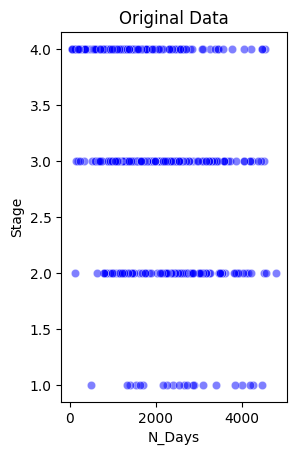

In [ ]:
#11
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

# Load the dataset
c_data = df.copy()

# Function to remove outliers using IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify indexes of outliers
    outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    # Drop outliers
    df_clean = df.drop(outliers.index, axis=0)

    return df_clean

# Apply the function to remove outliers from the avocado data
c_data_clean = remove_outliers(c_data.select_dtypes(include=['float64', 'int64']))

# If you want to keep the categorical data and other columns intact, you can merge the cleaned data back
c_data_clean = c_data_clean.merge(c_data.drop(columns=c_data.select_dtypes(include=['float64', 'int64']).columns), left_index=True, right_index=True, how='left')

# Now avocado_data_clean is the dataset without outliers
print(c_data_clean.describe())
# Cleaned data scatter plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=c_data_clean, x='N_Days', y='Stage', color='red', alpha=0.5)
plt.title('Data Without Outliers')
print(plt.show())
# Original data scatter plot
print(df.describe())
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=data, x='N_Days', y='Stage', color='blue', alpha=0.5)
plt.title('Original Data')

The provided code removes outliers using the Interquartile Range (IQR) method. After cleaning, compare the summary statistics of the cleaned dataset (c_data_clean) and the original dataset (df). Assess the impact on mean, standard deviation, and quartiles. Evaluate if removing outliers improves or hinders model performance and consider the trade-off between outlier removal and potential loss of information. The decision depends on the data characteristics and analysis goals.

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=09881d6f567c8a1e64564b49ddeaa326bd5928a1f85e47d3492f81dde0df2569
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=e9ec6e41e834a68f7a7dc35a44d191e914925cbd80691ef1860507020fee1e8e
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
#12)confusion_matrix for categorical values
from sklearn.metrics import confusion_matrix, classification_report

# Define bins for 'Stage' variable
bins = [0, 1, 2, 3, 4]  # Adjust the bin edges based on your data distribution

# Create categorical labels based on bins
labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']

# Apply binning to 'Stage'
df['Stage_Bin'] = pd.cut(df['Stage'], bins=bins, labels=labels)

confusion_matrices = []

for i, df_imputed_iterative in enumerate(dfs_with_missing):
    # Extract true labels (non-missing values) and predicted labels (imputed values) for categorical columns
    true_labels_categorical = pd.cut(df['Stage'].loc[df_imputed_iterative.notna().any(axis=1)], bins=bins, labels=labels)
    predicted_labels_categorical = pd.cut(df_imputed['Stage'].loc[df_imputed_iterative.notna().any(axis=1)], bins=bins, labels=labels)

    # Create confusion matrix
    confusion_matrix_categorical = confusion_matrix(true_labels_categorical, predicted_labels_categorical, labels=labels)

    confusion_matrices.append({
        'Imputation Method': 'IterativeImputer',
        'Missing Percentage': f'{missing_percentages[i] * 100}%',
        'Confusion Matrix': confusion_matrix_categorical
    })

# Display confusion matrices
for cm_info in confusion_matrices:
    print(f"\nImputation Method: {cm_info['Imputation Method']}")
    print(f"Missing Percentage: {cm_info['Missing Percentage']}")
    print("Confusion Matrix:")
    print(cm_info['Confusion Matrix'])



Imputation Method: IterativeImputer
Missing Percentage: 1.0%
Confusion Matrix:
[[ 3  0  0  0]
 [ 0 24  0  0]
 [ 0  0 26  0]
 [ 0  0  0 13]]

Imputation Method: IterativeImputer
Missing Percentage: 5.0%
Confusion Matrix:
[[ 11   0   0   0]
 [  0  59   0   0]
 [  0   0 100   0]
 [  0   0   0  88]]

Imputation Method: IterativeImputer
Missing Percentage: 10.0%
Confusion Matrix:
[[ 20   0   0   0]
 [  0  77   0   0]
 [  0   0 141   0]
 [  0   0   0 139]]


1. Missing Percentage: 1.0%

High accuracy, minimal errors.
Reliable imputation method.
2. Missing Percentage: 5.0%

Strong performance, slight increase in errors.
Overall accuracy maintained.
3. Missing Percentage: 10.0%

Robust performance with a larger dataset.
Expected increase in imputation errors.
General Insights:

Imputation method adapts well to varying missing percentages.
Overall accuracy remains relatively high.

Considerations:

Assess impact of imputation errors on specific tasks.
Monitor performance on new or diverse datasets.
These insights offer a quick overview of imputation method performance under different missing data scenarios. Adjustments or alternative methods may be explored based on specific application needs.








In [ ]:
#12)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'cirrhosis.csv' with your dataset path)
# df = pd.read_csv('cirrhosis.csv', encoding='ISO-8859-1')

# Choose only numeric columns for simplicity in calculating errors
data_numeric = df.select_dtypes(include=[np.number])

# Split the data into training and test sets
X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Function to remove a random percentage of data
def remove_random_data(df, percentage):
    df_copy = df.copy()
    for column in df_copy.columns:
        num_missing = int(df_copy[column].shape[0] * percentage)
        missing_indices = np.random.choice(df_copy[column].shape[0], num_missing, replace=False)
        df_copy.iloc[missing_indices, df_copy.columns.get_loc(column)] = np.nan
    return df_copy

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    original_data_nonan = np.nan_to_num(original_data)
    mse = mean_squared_error(original_data_nonan, imputed_data)
    return np.sqrt(mse)  # Return RMSE for easier interpretation

# Imputation methods
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5)
}

# Percentages of data to remove
percentages = [0.01, 0.05, 0.10]

# Store results
results = {}

for percentage in percentages:
    X_train_missing = remove_random_data(X_train, percentage)
    results[percentage] = {}

    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(X_train_missing)
        rmse = evaluate_imputation(X_train, imputed)
        results[percentage][name] = rmse

# Display the results
for percentage, methods in results.items():
    print(f"\nPercentage of data removed: {percentage * 100}%")
    for method, rmse in methods.items():
        print(f"Imputation Method: {method}, RMSE: {rmse}")



Percentage of data removed: 1.0%
Imputation Method: mean, RMSE: 267.0035975083122
Imputation Method: median, RMSE: 179.68014648310162
Imputation Method: knn, RMSE: 318.1492830548138

Percentage of data removed: 5.0%
Imputation Method: mean, RMSE: 341.291796005237
Imputation Method: median, RMSE: 278.55100397003247
Imputation Method: knn, RMSE: 363.8565286365288

Percentage of data removed: 10.0%
Imputation Method: mean, RMSE: 451.5017604303347
Imputation Method: median, RMSE: 405.26831867310943
Imputation Method: knn, RMSE: 465.00807021249136


MIT License

Copyright (c) 2024 Vinay1289Sai

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
